<a href="https://colab.research.google.com/github/mohammadbadi/CrimeAnalytics_Clustering/blob/main/Code%20Sections/5.2%20Creating%20Target%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **5.2	Creating Target Dataset**

In [ ]:
import warnings                                                                   # Import necessary libraries
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import os
import contextlib
from google.colab import files
from IPython.display import display, HTML
from kagglehub import KaggleDatasetAdapter

print("\n\n")
warnings.filterwarnings("ignore", category=DeprecationWarning)                    # Ignore Deprecation Warnings
warnings.filterwarnings("ignore", category=FutureWarning)                         # Ignore future warnings

file_path = "major-crime-indicators.csv"                                          # Set the file path to the filename with extension

crime_df = kagglehub.load_dataset(                                                # Load the latest version of the dataset from Kaggle
    kagglehub.KaggleDatasetAdapter.PANDAS,
    "mohammadbadi/crimes-in-toronto",                                             # Updated dataset handle
    file_path,
)

initial_count = df.shape[0]

filter1_df = df[(df['UCR_CODE'] == 2135) & (df['UCR_EXT'] == 210)].copy()         # Filter 1: UCR Code 2135 with UCR Extension 210
count1 = filter1_df.shape[0]

filter2_df = df[(df['UCR_CODE'] == 1610) & (df['UCR_EXT'] == 140)].copy()         # Filter 2: UCR Code 1610 with UCR Extension 140
count2 = filter2_df.shape[0]

final_df = pd.concat([filter1_df, filter2_df]).copy()                             # Final dataset: Union of both filters
final_count = final_df.shape[0]

final_df.to_csv('Target_Dataset.csv', index=False)                                # Save the final dataset as Target_Dataset.csv
files.download('Target_Dataset.csv')                                              # Download the saved dataset csv

steps_summary = []                                                                # Build steps summary as a list of dictionaries
steps_summary.append({
    "Step Taken": "Filter 1: UCR Code 2135 with UCR Extension 210",
    "Before Action": initial_count,
    "Affected by Action": count1,
    "After Action": count1,
    "Unit": "Rows"
})
steps_summary.append({
    "Step Taken": "Filter 2: UCR Code 1610 with UCR Extension 140",
    "Before Action": count1,                                                      # using count1 as the 'After Action' of Filter 1
    "Affected by Action": count2,
    "After Action": final_count,
    "Unit": "Rows"
})
steps_summary.append({
    "Step Taken": "Rows Affected in <strong>UCR Filtering</strong>",
    "Before Action": "Initial Load:<br><strong>" + str(initial_count) + "</strong>",
    "Affected by Action": "Rows Filtered:<br><strong>" + str(initial_count - final_count) + "</strong>",
    "After Action": "Final Count:<br><strong>" + str(final_count) + "</strong>",
    "Unit": "Rows"
})

html_output_filename = '/content/5.2 Target Dataset.html'                         # Set the HTML output filename
                                                                                  # Create HTML Table with styling
html_table = """
<table style='border-collapse: collapse; width: 100%; font-size: 18px;'>
    <thead style='background-color: #4CAF50; color: white;'>
        <tr>
            <th colspan="5" style="text-align: center; font-size: 24px; background-color: #2f4f4f; color: white;">
                5.2 Creating Target Dataset
            </th>
        </tr>
        <tr>
            <th>Step Taken</th>
            <th>Before Action</th>
            <th>Affected by Action</th>
            <th>After Action</th>
            <th>Unit</th>
        </tr>
    </thead>
    <tbody>
"""

for step in steps_summary:
    html_table += f"""
    <tr style='border: 1px solid #dddddd;'>
        <td style='border: 1px solid #dddddd; padding: 8px;'>{step['Step Taken']}</td>
        <td style='border: 1px solid #dddddd; padding: 8px;'>{step['Before Action']}</td>
        <td style='border: 1px solid #dddddd; padding: 8px;'>{step['Affected by Action']}</td>
        <td style='border: 1px solid #dddddd; padding: 8px;'>{step['After Action']}</td>
        <td style='border: 1px solid #dddddd; padding: 8px;'>{step['Unit']}</td>
    </tr>
    """

note_text = (                                                                     # Add a final row with the note (spanning all columns)
    "<strong>Note: The dataset contains "
    "<span style='color: darkred; '>ALL CRIMES</span>, but our research focuses on "
    "<span style='color: green; '>MOTOR VEHICLE THEFTS</span>. "
    "Therefore, we applied two filters: <br>"
    "• Filter 1: UCR Code 2135 with UCR Extension 210 for Theft of a Motor Vehicle (Auto Theft), and <br>"
    "• Filter 2: UCR Code 1610 with UCR Extension 140 for Robbery - Vehicle Jacking.<br>"
    "The target dataset has been saved as <span style='color: blue;'>'Target_Dataset.csv'</span> for further analysis. </strong>"
)
html_table += f"""
    <tr style='border: 1px solid #dddddd;'>
        <td colspan="5" style='border: 1px solid #dddddd; padding: 8px;'>{note_text}</td>
    </tr>
"""
html_table += "</tbody></table>"


print("\n\n")
display(HTML(html_table))                                                          # Display the output HTML table

with open(html_output_filename, 'w', encoding='utf-8') as f:
    f.write(html_table)
files.download(html_output_filename)
print("\n\n")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

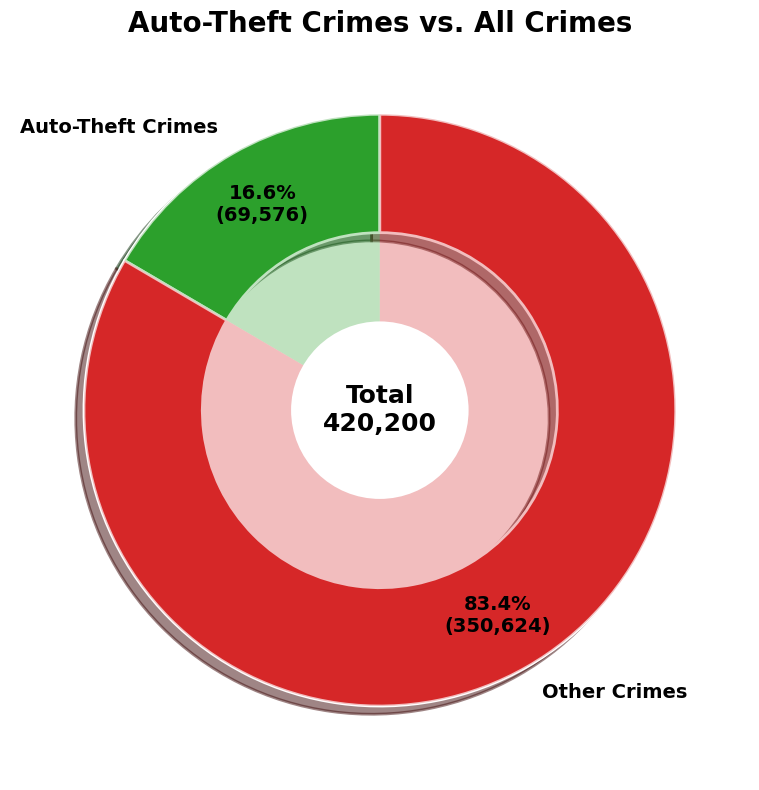

In [3]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, Wedge
from matplotlib.collections import PatchCollection
from google.colab import files
from IPython.display import display, HTML
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Suppress warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the dataset from Kaggle
file_path = "major-crime-indicators.csv"
crime_df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "mohammadbadi/crimes-in-toronto",  # Dataset handle
    file_path,
)

# Total number of records in the dataset
total_count = crime_df.shape[0]

# Filter for Auto-Theft crimes based on UCR codes:
# Filter 1: UCR Code 2135 with UCR Extension 210 (Theft of a Motor Vehicle)
filter1_df = crime_df[(crime_df['UCR_CODE'] == 2135) & (crime_df['UCR_EXT'] == 210)].copy()
# Filter 2: UCR Code 1610 with UCR Extension 140 (Robbery - Vehicle Jacking)
filter2_df = crime_df[(crime_df['UCR_CODE'] == 1610) & (crime_df['UCR_EXT'] == 140)].copy()

# Combine the two filters to get all auto-theft-related records
auto_theft_df = pd.concat([filter1_df, filter2_df]).copy()
auto_theft_count = auto_theft_df.shape[0]

# Calculate the percentage of auto-theft crimes in the whole dataset
auto_theft_percentage = (auto_theft_count / total_count) * 100

# Prepare data for the donut chart
labels = ['Auto-Theft Crimes', 'Other Crimes']
sizes = [auto_theft_count, total_count - auto_theft_count]
colors = ['#2ca02c', '#d62728']

# Custom function to display both percentage and absolute value on each wedge
def autopct_format(pct, allvals):
    absolute = int(np.round(pct/100. * np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:,})"

# Create the donut chart with a thick ring and shadow effect to simulate a 3D look
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

# Draw the pie (donut) chart; using a thicker ring (smaller hole)
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: autopct_format(pct, sizes),
    startangle=90,
    pctdistance=0.8,  # Position of the autopct text on the wedge
    colors=colors,
    shadow=True,
    wedgeprops=dict(width=0.4, edgecolor='w', linewidth=2)  # Adjust width for a thick "donut"
)

# Simulate a gradient effect by darkening the outer edge of each wedge
# (This is a simple simulation by drawing a slightly larger, transparent wedge underneath)
for i, w in enumerate(wedges):
    # Get the theta values for the wedge
    theta1, theta2 = w.theta1, w.theta2
    # Draw a background wedge with a slightly darker color and lower alpha to simulate depth
    shadow_wedge = Wedge(center=(0, 0), r=1.0, theta1=theta1, theta2=theta2,
                         facecolor=colors[i], alpha=0.3, lw=0)
    ax.add_patch(shadow_wedge)

# Create a white circle in the center for the donut hole and to display the total count
centre_circle = Circle((0, 0), 0.3, fc='white', ec='white', lw=0)
ax.add_artist(centre_circle)

# Add text in the center of the donut (white portion) with the total number of records
ax.text(0, 0, f"Total\n{total_count:,}", horizontalalignment='center',
        verticalalignment='center', fontsize=18, fontweight='bold', color='black')

# Improve text properties for wedge labels
plt.setp(autotexts, size=14, weight="bold", color="black")
plt.setp(texts, size=14, weight="bold")

ax.set_title("Auto-Theft Crimes vs. All Crimes", fontsize=20, weight="bold")
plt.tight_layout()
plt.show()

# Display summary as HTML output
html_output = f"""
<h2>Auto-Theft Dataset Summary</h2>
<p><strong>Total Crimes:</strong> {total_count:,} records</p>
<p><strong>Auto-Theft Crimes:</strong> {auto_theft_count:,} records</p>
<p><strong>Percentage of Auto-Theft Crimes:</strong> {auto_theft_percentage:.1f}%</p>
"""
display(HTML(html_output))
